#Daily Challenge

###NumPy, Pandas & Matplotlib Integration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Import and Cleaning:**

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.

In [2]:
df = pd.read_csv('global_power_plant_database.csv')
df.head()

/tmp/ipython-input-2844434236.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [5]:
df.isnull().sum()

,0
country,0
country_long,0
name,0
gppd_idnr,0
capacity_mw,0
latitude,0
longitude,0
primary_fuel,0
other_fuel1,32992
other_fuel2,34660


In [7]:
#showing percentage of each column with missing values
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
display(missing_percentage.head(10))

,0
other_fuel3,99.736661
other_fuel2,99.209984
other_fuel1,94.435539
generation_gwh_2013,81.632127
generation_gwh_2014,79.316464
generation_gwh_2015,76.519922
generation_gwh_2016,73.826425
generation_gwh_2017,72.807419
generation_gwh_2018,72.415274
generation_gwh_2019,72.352301


In [8]:
#dropping collumns with more than 50% of missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_drop)
print(f"New DataFrame shape: {df.shape}")

New DataFrame shape: (34936, 19)


The columns with more than 50% missing values have been dropped from the DataFrame. The new shape of the DataFrame is shown above, indicating the remaining number of rows and columns.

In [10]:
#checking for remaining null values
remaining_nulls = df.isnull().sum().sort_values(ascending=False)
display(remaining_nulls[remaining_nulls > 0])

,0
estimated_generation_gwh_2016,17366
owner,14068
estimated_generation_gwh_2017,1798
geolocation_source,419
url,18
source,15


In [12]:
#using mode to impute missing values in 'owner' column
owner_mode = df['owner'].mode()[0]
df['owner'] = df['owner'].fillna(owner_mode)
print(f"Null values remaining in 'owner' column: {df['owner'].isnull().sum()}")

Null values remaining in 'owner' column: 0


In [13]:
#using median to fill missing values in 'estimated_generation_gwh_2016'
median_generation_2016 = df['estimated_generation_gwh_2016'].median()
df['estimated_generation_gwh_2016'] = df['estimated_generation_gwh_2016'].fillna(median_generation_2016)
print(f"Null values remaining in 'estimated_generation_gwh_2016' column: {df['estimated_generation_gwh_2016'].isnull().sum()}")

Null values remaining in 'estimated_generation_gwh_2016' column: 0


In [14]:
#using median to fill the missing values in 'estimated_generation_gwh_2017'
median_generation_2017 = df['estimated_generation_gwh_2017'].median()
df['estimated_generation_gwh_2017'] = df['estimated_generation_gwh_2017'].fillna(median_generation_2017)
print(f"Null values remaining in 'estimated_generation_gwh_2017' column: {df['estimated_generation_gwh_2017'].isnull().sum()}")

Null values remaining in 'estimated_generation_gwh_2017' column: 0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   owner                           34936 non-null  object 
 9   source                          34936 non-null  object 
 10  url                             34936 non-null  object 
 11  geolocation_source              34936 non-null  object 
 12  estimated_generation_gwh_2016   

In [16]:
# Using mode to impute missing values in 'source' column
source_mode = df['source'].mode()[0]
df['source'] = df['source'].fillna(source_mode)
print(f"Null values remaining in 'source' column: {df['source'].isnull().sum()}")

Null values remaining in 'source' column: 0


In [17]:
# Using mode to impute missing values in 'url' column
url_mode = df['url'].mode()[0]
df['url'] = df['url'].fillna(url_mode)
print(f"Null values remaining in 'url' column: {df['url'].isnull().sum()}")

Null values remaining in 'url' column: 0


In [15]:
# Using mode to impute missing values in 'geolocation_source' column
geolocation_source_mode = df['geolocation_source'].mode()[0]
df['geolocation_source'] = df['geolocation_source'].fillna(geolocation_source_mode)
print(f"Null values remaining in 'geolocation_source' column: {df['geolocation_source'].isnull().sum()}")

Null values remaining in 'geolocation_source' column: 0


**Exploratory Data Analysis:**

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

In [19]:
display(df.describe())

,capacity_mw,latitude,longitude,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000
mean,163.355148,32.816637,-6.972803,132.232824,681.505825
std,489.636072,22.638603,78.405850,899.269378,2424.229996
min,1.000000,-77.847000,-179.977700,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,27.067500,8.960000
50%,16.745000,39.727750,-2.127100,27.555000,37.590000
75%,75.344250,46.263125,49.502675,28.040000,195.640000
max,22500.000000,71.292000,179.388700,60859.730000,82810.770000


In [23]:
#exploring the distribution by fuel
power_plants_by_fuel = df['primary_fuel'].value_counts()
display(power_plants_by_fuel.head(10))

,count
primary_fuel,
Solar,10665
Hydro,7156
Wind,5344
Gas,3998
Coal,2330
Oil,2320
Biomass,1430
Waste,1068
Nuclear,195


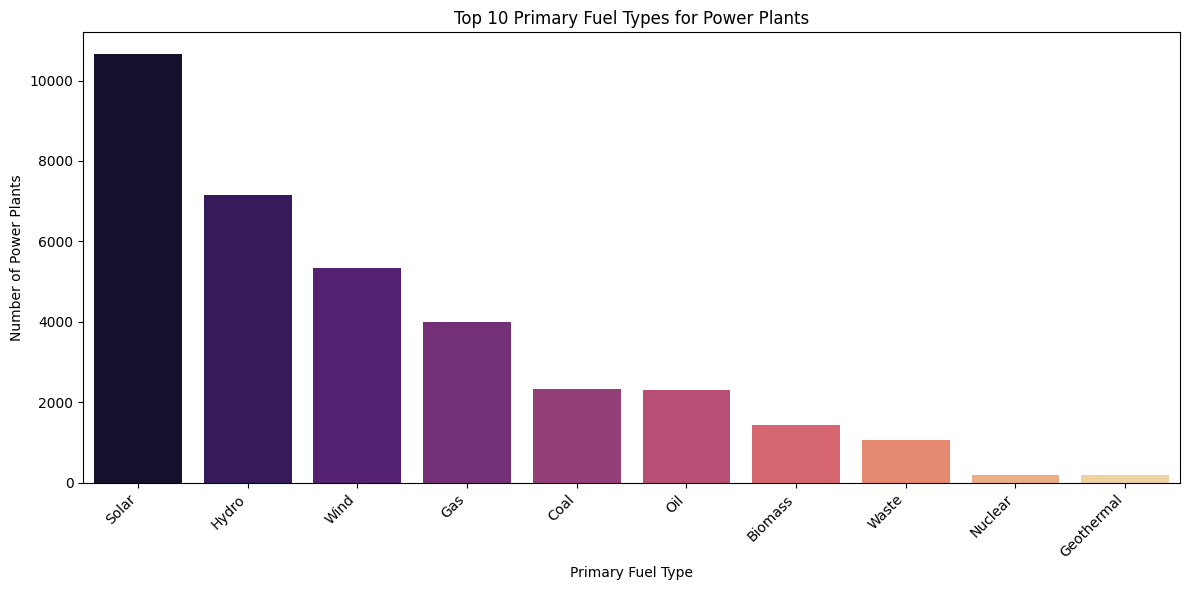

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=power_plants_by_fuel.head(10).index, y=power_plants_by_fuel.head(10).values, hue=power_plants_by_fuel.head(10).index, palette='magma', legend=False)
plt.title('Top 10 Primary Fuel Types for Power Plants')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
#exploring the distribution by country
power_plants_by_country = df['country_long'].value_counts()
display(power_plants_by_country.head(10))

,count
country_long,
United States of America,9833
China,4235
United Kingdom,2751
Brazil,2360
France,2155
India,1589
Germany,1309
Canada,1159
Spain,829


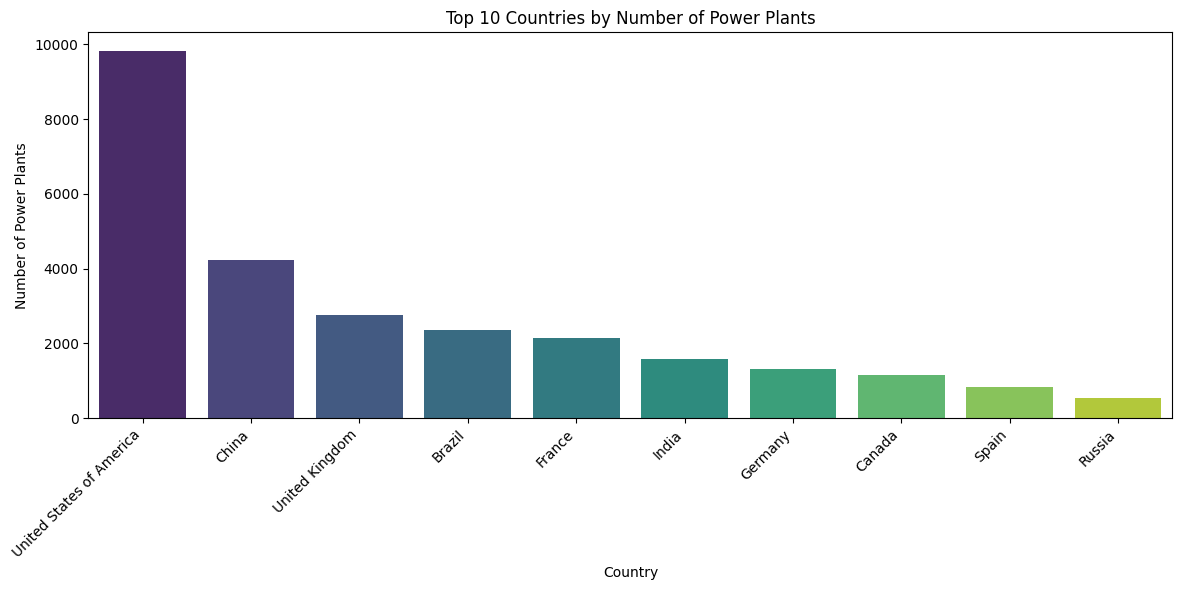

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=power_plants_by_country.head(10).index, y=power_plants_by_country.head(10).values, hue=power_plants_by_country.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Countries by Number of Power Plants')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Statistical Analysis:**

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

Calculate the mean, median, and standard deviation of 'capacity_mw' grouped by 'primary_fuel', then prepare the data for ANOVA testing by creating separate groups for each fuel type's 'capacity_mw', and finally perform an ANOVA test to compare the mean power output across different fuel types. Afterwards, visualize the distribution of 'capacity_mw' for each 'primary_fuel' using a box or violin plot, and present the statistical summary and ANOVA results with their interpretations.

Calculate key statistical measures (mean, median, standard deviation) for the 'capacity_mw' column, grouped by 'primary_fuel'. This will provide a foundational understanding of power output characteristics for each fuel type.


**Reasoning**:
To calculate the key statistical measures (mean, median, standard deviation) for 'capacity_mw' grouped by 'primary_fuel', I will use the `.groupby()` method followed by `.agg()` to compute these statistics.



In [25]:
fuel_type_stats = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std'])
display(fuel_type_stats)

,mean,median,std
primary_fuel,,,
Biomass,23.972938,9.45000,39.461805
Coal,843.579828,600.00000,888.187187
Cogeneration,98.731707,31.90000,283.428252
Gas,373.449375,147.50000,560.934146
Geothermal,67.130952,30.00000,114.640890
Hydro,147.171551,20.00000,549.809328
Nuclear,2091.855179,1888.00000,1303.509273
Oil,112.878754,9.00000,392.009039
Other,84.020000,40.00000,145.891392


Prepare Data for Hypothesis Testing

Extract the 'capacity_mw' data for each distinct 'primary_fuel' type into separate groups or lists, as required for statistical hypothesis testing functions.


**Reasoning**:
First, I'll get the unique values from the 'primary_fuel' column to know all the distinct fuel types for which I need to extract capacity data. This is the first instruction of the subtask.



In [26]:
unique_fuel_types = df['primary_fuel'].unique()
print("Unique Primary Fuel Types:")
print(unique_fuel_types)

Unique Primary Fuel Types:
['Hydro' 'Solar' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Waste'
 'Biomass' 'Wave and Tidal' 'Petcoke' 'Geothermal' 'Storage'
 'Cogeneration']


**Reasoning**:
Now that the unique fuel types are identified, I will iterate through them to extract the 'capacity_mw' data for each type and store them in a dictionary for easy access in later hypothesis testing. This directly addresses the subtask's requirement to prepare data for ANOVA.



In [27]:
capacity_by_fuel_type = {}
for fuel_type in unique_fuel_types:
    capacity_by_fuel_type[fuel_type] = df[df['primary_fuel'] == fuel_type]['capacity_mw'].dropna().tolist()

# Display the first few entries for verification
print("Number of entries for 'Hydro' fuel type:", len(capacity_by_fuel_type.get('Hydro', [])))
print("First 5 capacity values for 'Hydro':", capacity_by_fuel_type.get('Hydro', [])[:5])

Number of entries for 'Hydro' fuel type: 7156
First 5 capacity values for 'Hydro': [33.0, 66.0, 100.0, 11.55, 6.0]


Perform ANOVA Test for Mean Power Output

Utilize SciPy's `f_oneway` function to perform an ANOVA (Analysis of Variance) test. This test will determine if there is a statistically significant difference between the mean 'capacity_mw' of the different 'primary_fuel' types.


**Reasoning**:
To perform the ANOVA test, I need to import the `f_oneway` function from `scipy.stats` and prepare the `capacity_mw` data for each fuel type by converting the dictionary values into a list of arrays, as required by the function.



In [28]:
from scipy.stats import f_oneway

# Prepare the data for ANOVA test
capacity_groups = [np.array(capacity_by_fuel_type[fuel]) for fuel in unique_fuel_types]

**Reasoning**:
Now that the data is prepared in `capacity_groups`, I will perform the ANOVA test using `f_oneway` and print the resulting F-statistic and p-value to determine if there's a significant difference in mean capacity between fuel types.



In [29]:
f_statistic, p_value = f_oneway(*capacity_groups)
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3e}")

F-statistic: 967.46
P-value: 0.000e+00


Visualize Distribution of Power Output by Fuel Type

Visualize the distribution of 'capacity_mw' for each 'primary_fuel' using an appropriate plot, such as a box plot or violin plot, to understand the spread and central tendency of power output across different fuel types. Afterwards, present the statistical summary and ANOVA results with their interpretations.


**Reasoning**:
Now that the ANOVA test is complete, the next step is to visualize the distribution of 'capacity_mw' for each 'primary_fuel' type. A violin plot is suitable for this as it shows both the distribution shape and density for each category.



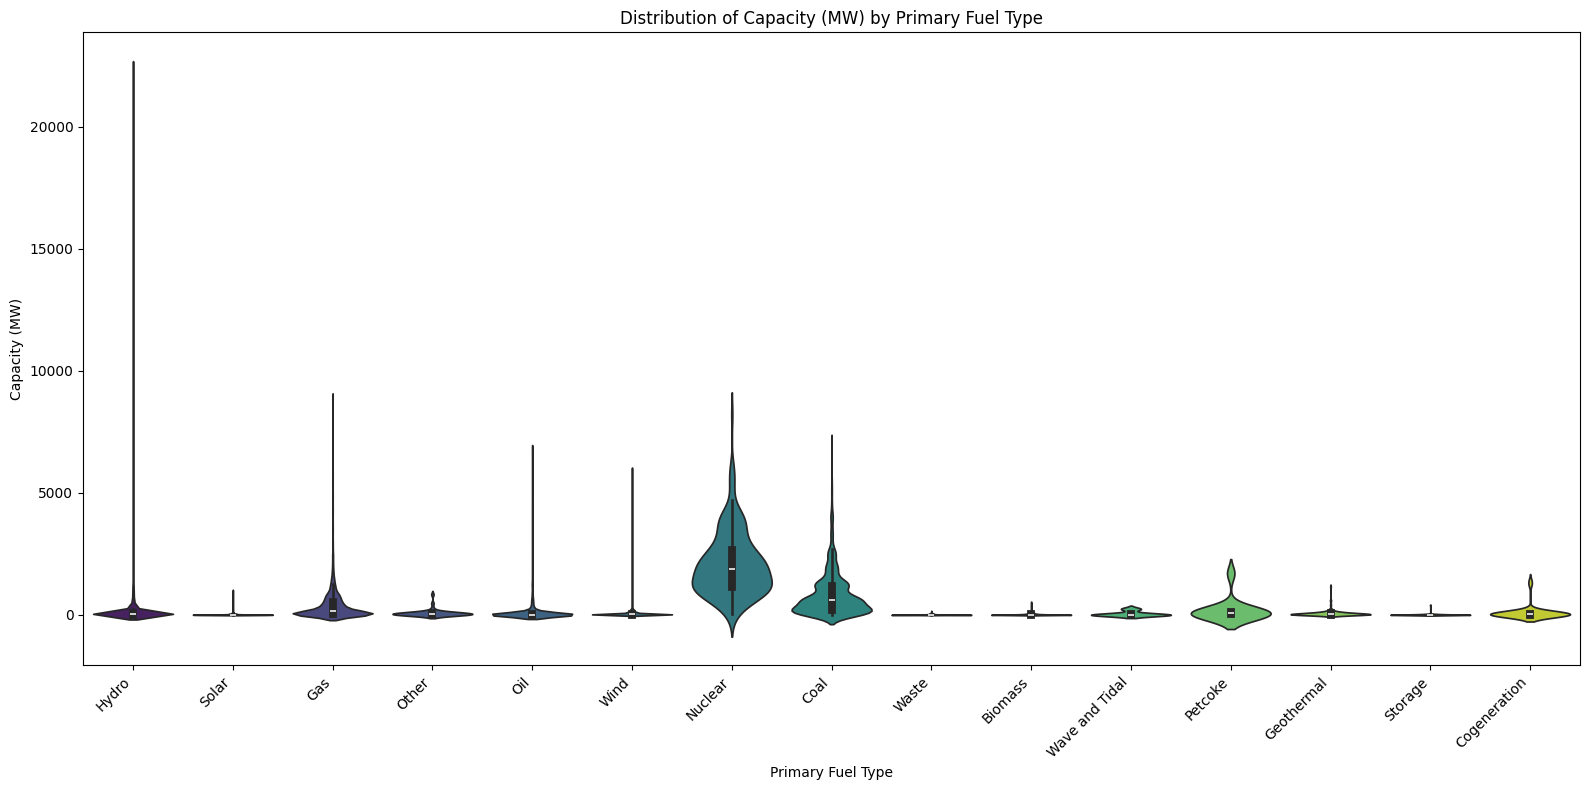

In [31]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='primary_fuel', y='capacity_mw', data=df, hue='primary_fuel', palette='viridis', legend=False)
plt.title('Distribution of Capacity (MW) by Primary Fuel Type')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Time Series Analysis:**

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

**Reasoning**:
To understand the `commissioning_year` column as requested, I will check its data type, count its missing values, and find its minimum and maximum year values. This will address all three instructions of the subtask.



In [33]:
print(f"Data type of 'estimated_generation_gwh_2016': {df['estimated_generation_gwh_2016'].dtype}")
print(f"Missing values in 'estimated_generation_gwh_2016': {df['estimated_generation_gwh_2016'].isnull().sum()}")
print(f"Minimum value in 'estimated_generation_gwh_2016': {df['estimated_generation_gwh_2016'].min()}")
print(f"Maximum value in 'estimated_generation_gwh_2016': {df['estimated_generation_gwh_2016'].max()}")

print(f"\nData type of 'estimated_generation_gwh_2017': {df['estimated_generation_gwh_2017'].dtype}")
print(f"Missing values in 'estimated_generation_gwh_2017': {df['estimated_generation_gwh_2017'].isnull().sum()}")
print(f"Minimum value in 'estimated_generation_gwh_2017': {df['estimated_generation_gwh_2017'].min()}")
print(f"Maximum value in 'estimated_generation_gwh_2017': {df['estimated_generation_gwh_2017'].max()}")

Data type of 'estimated_generation_gwh_2016': float64
Missing values in 'estimated_generation_gwh_2016': 0
Minimum value in 'estimated_generation_gwh_2016': 0.3
Maximum value in 'estimated_generation_gwh_2016': 60859.73

Data type of 'estimated_generation_gwh_2017': float64
Missing values in 'estimated_generation_gwh_2017': 0
Minimum value in 'estimated_generation_gwh_2017': 0.0
Maximum value in 'estimated_generation_gwh_2017': 82810.77


Calculate the total estimated generation (GWh) for each primary fuel type for the years 2016 and 2017 to understand the energy mix for these periods.


**Reasoning**:
To understand the energy mix, I will group the DataFrame by 'primary_fuel' and sum the 'estimated_generation_gwh_2016' column for each fuel type.



In [34]:
generation_2016_by_fuel = df.groupby('primary_fuel')['estimated_generation_gwh_2016'].sum()
display(generation_2016_by_fuel.sort_values(ascending=False).head())


,estimated_generation_gwh_2016
primary_fuel,
Hydro,3523871.700
Wind,416975.125
Solar,354489.210
Gas,110164.890
Coal,64203.150


**Reasoning**:
Following the previous step, I will now group the DataFrame by 'primary_fuel' and calculate the sum of 'estimated_generation_gwh_2017' for each fuel type to complete the energy mix analysis for both years.



In [35]:
generation_2017_by_fuel = df.groupby('primary_fuel')['estimated_generation_gwh_2017'].sum()
display(generation_2017_by_fuel.sort_values(ascending=False).head())

print("\nTotal Estimated Generation (GWh) by Primary Fuel Type for 2016:")
display(generation_2016_by_fuel.sort_values(ascending=False))

print("\nTotal Estimated Generation (GWh) by Primary Fuel Type for 2017:")
display(generation_2017_by_fuel.sort_values(ascending=False))

,estimated_generation_gwh_2017
primary_fuel,
Coal,9654354.13
Gas,6023826.64
Hydro,3541440.61
Nuclear,2902487.50
Wind,689139.04



Total Estimated Generation (GWh) by Primary Fuel Type for 2016:


,estimated_generation_gwh_2016
primary_fuel,
Hydro,3523871.700
Wind,416975.125
Solar,354489.210
Gas,110164.890
Coal,64203.150
Oil,63927.600
Biomass,39403.650
Waste,29428.740
Nuclear,5373.225



Total Estimated Generation (GWh) by Primary Fuel Type for 2017:


,estimated_generation_gwh_2017
primary_fuel,
Coal,9654354.13
Gas,6023826.64
Hydro,3541440.61
Nuclear,2902487.50
Wind,689139.04
Oil,502950.31
Solar,347580.34
Geothermal,61260.98
Biomass,53753.70


## Visualize Fuel Mix Trends



**Reasoning**:
To combine the two Series into a single DataFrame as instructed, I will use `pd.DataFrame` and pass a dictionary with the Series, specifying the column names for each year. This will create a DataFrame suitable for plotting.



In [36]:
combined_generation = pd.DataFrame({
    '2016_Generation': generation_2016_by_fuel,
    '2017_Generation': generation_2017_by_fuel
})

# Display the combined DataFrame to verify
display(combined_generation.head())

,2016_Generation,2017_Generation
primary_fuel,,
Biomass,39403.650,53753.70
Coal,64203.150,9654354.13
Cogeneration,1129.755,1541.19
Gas,110164.890,6023826.64
Geothermal,5207.895,61260.98


**Reasoning**:
To visualize the estimated generation for each fuel type across 2016 and 2017, I will use the `combined_generation` DataFrame to create a stacked bar chart. This will clearly illustrate the mix of primary fuel types for power generation in these two years, addressing instructions 2-6 of the subtask.



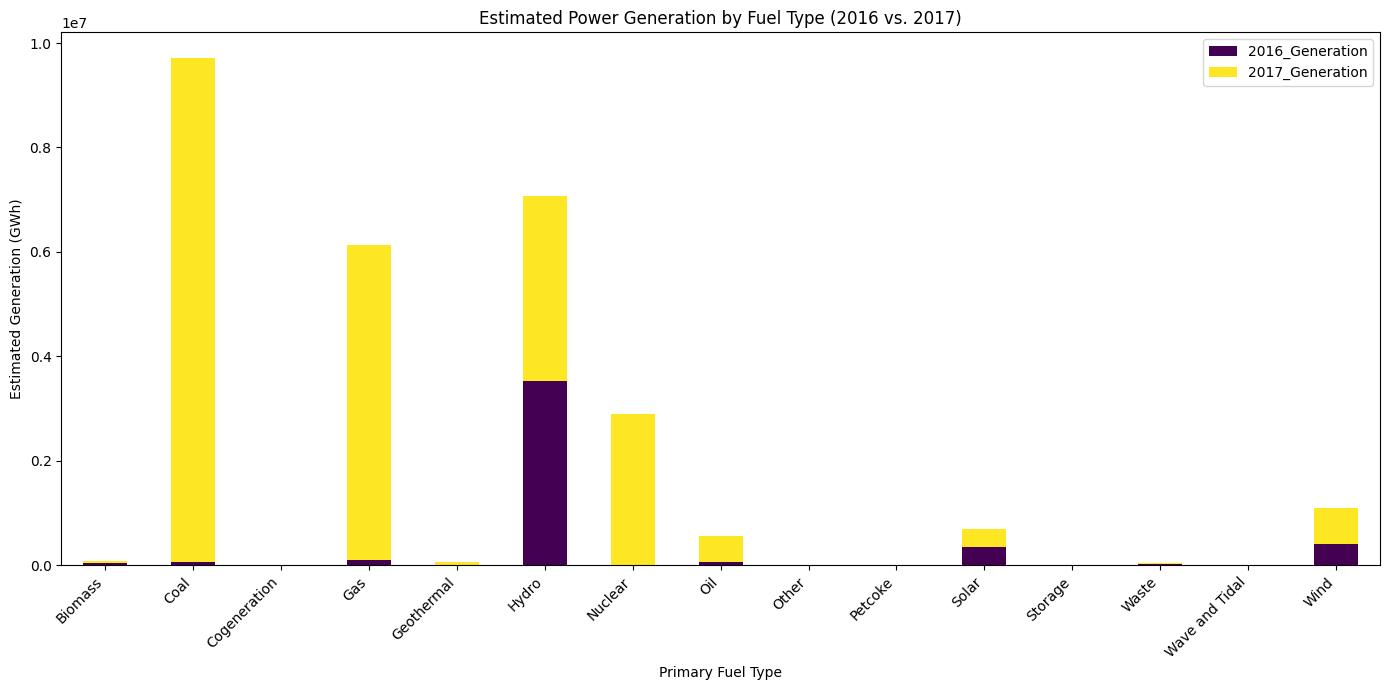

In [37]:
combined_generation.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Estimated Power Generation by Fuel Type (2016 vs. 2017)')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Estimated Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Advanced Visualization:**

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

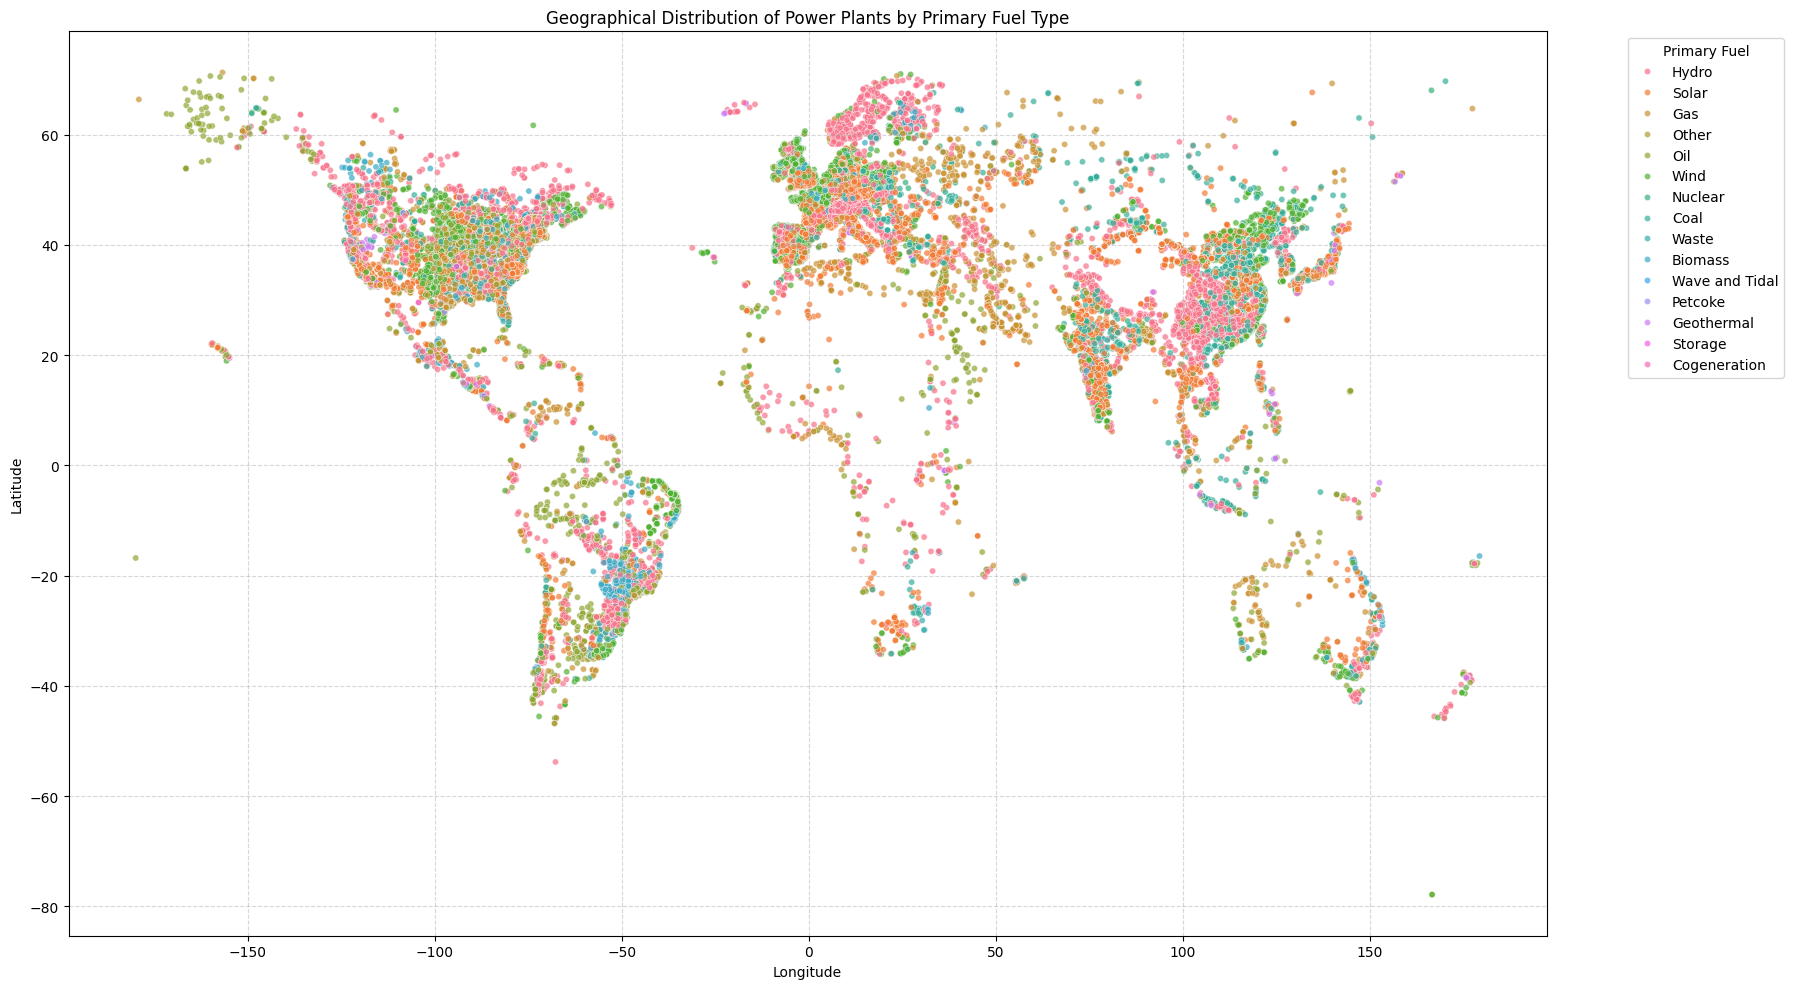

In [38]:
plt.figure(figsize=(18, 10))
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=df, s=20, alpha=0.7)
plt.title('Geographical Distribution of Power Plants by Primary Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Primary Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Matrix Operations in Real-World Context:**

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

**Reasoning**:
To begin the subtask, I will select the specified numerical columns from the `df` DataFrame and store them in a new DataFrame called `numerical_features`. This aligns with the first instruction to prepare the data for standardization.



In [39]:
numerical_features = df[['capacity_mw', 'latitude', 'longitude', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017']]
print("Selected numerical features:")
display(numerical_features.head())

Selected numerical features:


,capacity_mw,latitude,longitude,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,33.0,32.322,65.1190,137.76,119.50
1,10.0,31.670,65.7950,17.70,18.29
2,10.0,31.623,65.7920,17.62,18.72
3,66.0,34.556,69.4787,230.18,174.91
4,100.0,34.641,69.7170,395.38,350.80


**Reasoning**:
Now that the numerical features are selected, I will import `StandardScaler`, instantiate it, and then fit and transform the `numerical_features` DataFrame to standardize the data, fulfilling the remaining instructions of the subtask.



In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame for better readability and to retain column names
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

print("Standardized numerical features (first 5 rows):")
display(scaled_features_df.head())

Standardized numerical features (first 5 rows):


,capacity_mw,latitude,longitude,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,-0.266232,-0.021850,0.919483,0.006146,-0.231832
1,-0.313207,-0.050650,0.928105,-0.127364,-0.273582
2,-0.313207,-0.052726,0.928067,-0.127453,-0.273404
3,-0.198834,0.076833,0.975088,0.108920,-0.208975
4,-0.129394,0.080588,0.978127,0.292627,-0.136419


**Reasoning**:
To calculate the covariance matrix, I will use the `.cov()` method on the `scaled_features_df` DataFrame, as instructed, and then display the result.



In [41]:
covariance_matrix = scaled_features_df.cov()
display(covariance_matrix)

,capacity_mw,latitude,longitude,estimated_generation_gwh_2016,estimated_generation_gwh_2017
capacity_mw,1.000029,-0.013218,0.151529,0.407163,0.946275
latitude,-0.013218,1.000029,-0.068356,-0.021769,-0.013642
longitude,0.151529,-0.068356,1.000029,0.034596,0.144954
estimated_generation_gwh_2016,0.407163,-0.021769,0.034596,1.000029,0.318145
estimated_generation_gwh_2017,0.946275,-0.013642,0.144954,0.318145,1.000029


**Reasoning**:
To perform eigenvalue decomposition, I will use `np.linalg.eig()` on the `covariance_matrix` as instructed, then store and print the resulting eigenvalues and eigenvectors.



In [42]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.2076018  0.04882954 0.76304953 1.04890831 0.93175395]

Eigenvectors:
[[ 0.6477804  -0.72012967 -0.23997201 -0.06481127  0.00259853]
 [-0.03087488  0.00215593  0.12526736 -0.77137912  0.62315683]
 [ 0.16997017  0.00698905  0.27897838  0.616927    0.71598424]
 [ 0.39012121  0.07744432  0.85244441 -0.13013516 -0.31338664]
 [ 0.6311441   0.68946512 -0.34961567 -0.05691802  0.02870886]]


**Reasoning**:
To interpret the eigenvalues and eigenvectors, I will first sort the eigenvalues in descending order and calculate the total variance and explained variance ratio for each, providing context for the principal components.



In [43]:
feature_names = numerical_features.columns

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues (variance explained by each principal component):")
for i, val in enumerate(sorted_eigenvalues):
    print(f"  PC{i+1}: {val:.4f}")

total_variance = np.sum(eigenvalues)
print(f"\nTotal variance (sum of all eigenvalues): {total_variance:.4f}")

explained_variance_ratio = sorted_eigenvalues / total_variance
print("\nExplained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

Sorted Eigenvalues (variance explained by each principal component):
  PC1: 2.2076
  PC2: 1.0489
  PC3: 0.9318
  PC4: 0.7630
  PC5: 0.0488

Total variance (sum of all eigenvalues): 5.0001

Explained Variance Ratio for each Principal Component:
  PC1: 0.4415 (44.15%)
  PC2: 0.2098 (20.98%)
  PC3: 0.1863 (18.63%)
  PC4: 0.1526 (15.26%)
  PC5: 0.0098 (0.98%)


**Reasoning**:
To analyze the eigenvectors effectively, I will create a DataFrame where rows are feature names and columns are principal components, making it easier to interpret the contribution of each original feature to the principal components.



In [44]:
eigenvectors_df = pd.DataFrame(
    sorted_eigenvectors,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(len(eigenvalues))]
)
print("Eigenvectors as a DataFrame:")
display(eigenvectors_df)

Eigenvectors as a DataFrame:


,PC1,PC2,PC3,PC4,PC5
capacity_mw,0.647780,-0.064811,0.002599,-0.239972,-0.720130
latitude,-0.030875,-0.771379,0.623157,0.125267,0.002156
longitude,0.169970,0.616927,0.715984,0.278978,0.006989
estimated_generation_gwh_2016,0.390121,-0.130135,-0.313387,0.852444,0.077444
estimated_generation_gwh_2017,0.631144,-0.056918,0.028709,-0.349616,0.689465


**Reasoning**:
To analyze the top eigenvectors, I will extract the coefficients for PC1 from the `eigenvectors_df` and identify the features with the largest absolute coefficients, which will indicate their primary direction of variance.



In [45]:
print("\nFeatures contributing most to PC1 (largest eigenvalue):")
pc1_contributions = eigenvectors_df['PC1'].abs().sort_values(ascending=False)
display(pc1_contributions)


Features contributing most to PC1 (largest eigenvalue):


,PC1
capacity_mw,0.647780
estimated_generation_gwh_2017,0.631144
estimated_generation_gwh_2016,0.390121
longitude,0.169970
latitude,0.030875


**Reasoning**:
To visualize feature relationships, I will first calculate the correlation matrix of the `scaled_features_df` as instructed, which is a prerequisite for creating the heatmap.



In [46]:
correlation_matrix = scaled_features_df.corr()
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,capacity_mw,latitude,longitude,estimated_generation_gwh_2016,estimated_generation_gwh_2017
capacity_mw,1.000000,-0.013218,0.151525,0.407151,0.946248
latitude,-0.013218,1.000000,-0.068354,-0.021769,-0.013642
longitude,0.151525,-0.068354,1.000000,0.034595,0.144950
estimated_generation_gwh_2016,0.407151,-0.021769,0.034595,1.000000,0.318136
estimated_generation_gwh_2017,0.946248,-0.013642,0.144950,0.318136,1.000000


**Reasoning**:
Now that the correlation matrix has been calculated, I will create a heatmap using `seaborn.heatmap()` to visualize the relationships, annotate it, add a title, and display the plot as per the instructions.



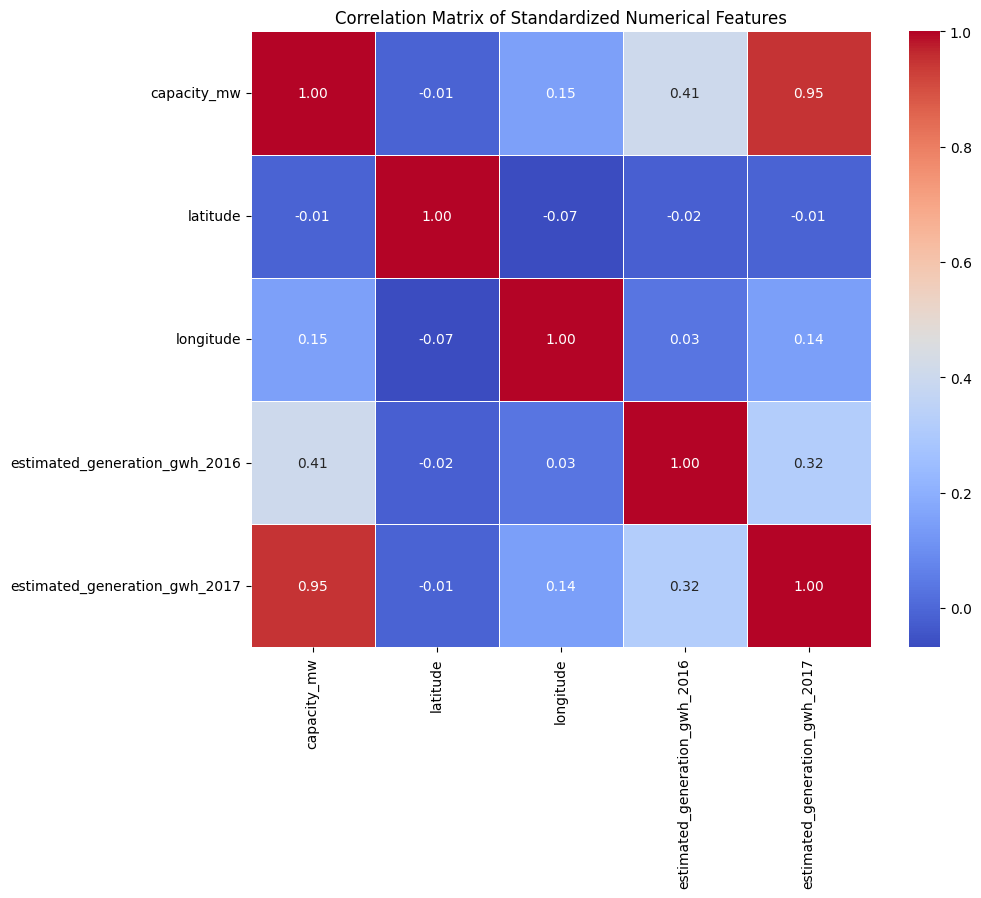

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Standardized Numerical Features')
plt.show()

**Integrating NumPy with Pandas and Matplotlib:**

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

**Reasoning**:
To categorize 'capacity_mw' into 'Small', 'Medium', and 'Large', I will define the specified thresholds and then use `np.where` to create the new 'Capacity_Category' column.



In [48]:
df['Capacity_Category'] = np.where(df['capacity_mw'] < 100, 'Small',
                                 np.where(df['capacity_mw'] < 1000, 'Medium', 'Large'))
display(df.head())

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,Capacity_Category
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,Cypress Creek Renewables,GEODB,http://globalenergyobservatory.org,GEODB,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Small
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,Cypress Creek Renewables,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,Small
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,Cypress Creek Renewables,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,Small
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,Cypress Creek Renewables,GEODB,http://globalenergyobservatory.org,GEODB,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Small
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,Cypress Creek Renewables,GEODB,http://globalenergyobservatory.org,GEODB,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Medium


**Reasoning**:
To show the distribution of power plants across the newly created capacity categories, I will use `value_counts()` on the 'Capacity_Category' column.



In [49]:
display(df['Capacity_Category'].value_counts())

,count
Capacity_Category,
Small,27104
Medium,6214
Large,1618


**Reasoning**:
To perform the vectorized calculation, I will divide 'estimated_generation_gwh_2017' by 'capacity_mw' to create the 'Normalized_Generation_2017' column and then display the head of the DataFrame to verify the new column.



In [50]:
df['Normalized_Generation_2017'] = df['estimated_generation_gwh_2017'] / df['capacity_mw']
display(df.head())

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,...,geolocation_source,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,Capacity_Category,Normalized_Generation_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,Cypress Creek Renewables,GEODB,...,GEODB,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Small,3.621212
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,Cypress Creek Renewables,Wiki-Solar,...,Wiki-Solar,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,Small,1.829000
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,Cypress Creek Renewables,Wiki-Solar,...,Wiki-Solar,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,Small,1.872000
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,Cypress Creek Renewables,GEODB,...,GEODB,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Small,2.650152
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,Cypress Creek Renewables,GEODB,...,GEODB,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Medium,3.508000


**Reasoning**:
To visualize the distribution of the log-transformed capacity, I will apply `np.log1p` to the 'capacity_mw' column and then create a KDE plot using Seaborn, adding appropriate labels and a title.



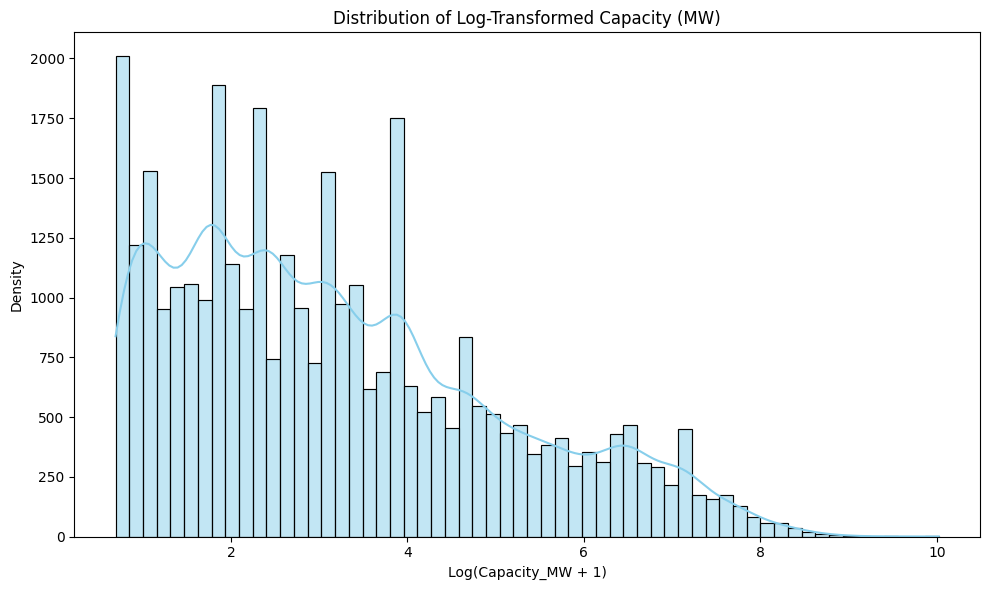

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['capacity_mw']), kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed Capacity (MW)')
plt.xlabel('Log(Capacity_MW + 1)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the geographical distribution of power plants with their capacity and category, I will create a scatter plot using Seaborn, mapping 'longitude' to the x-axis, 'latitude' to the y-axis, scaling point sizes by the square root of 'capacity_mw', and coloring points by 'Capacity_Category'.



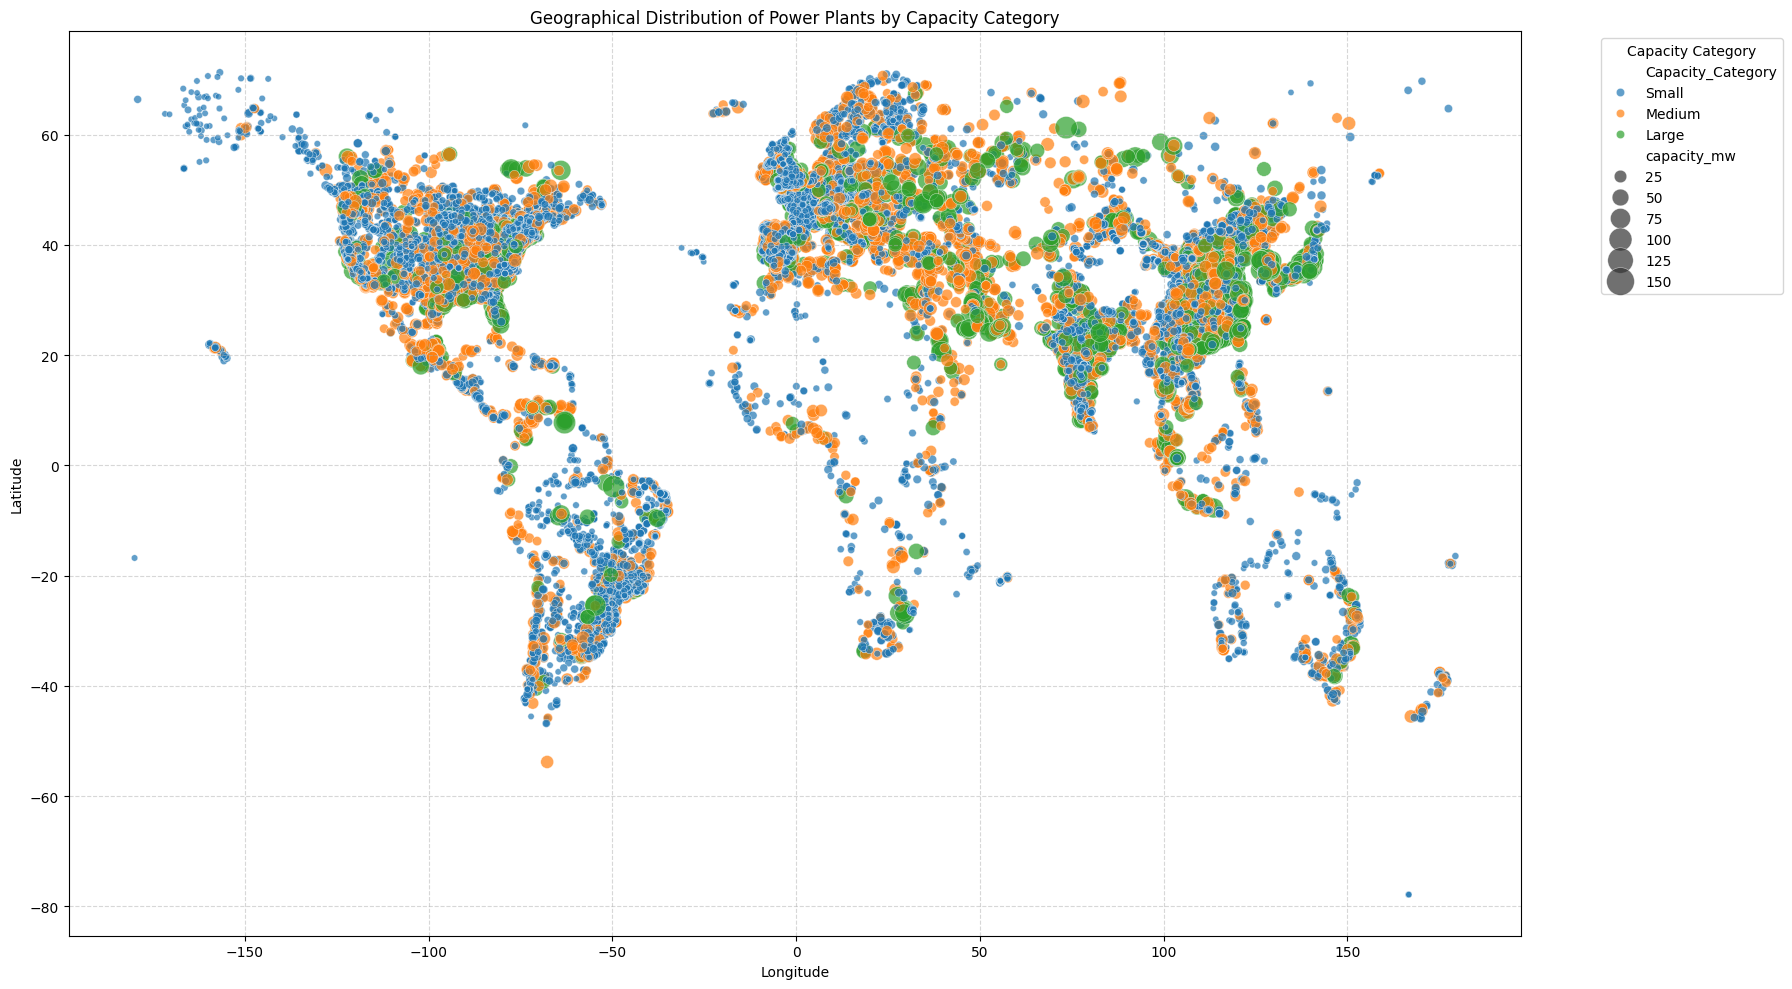

In [52]:
plt.figure(figsize=(18, 10))
sns.scatterplot(x='longitude', y='latitude', size=np.sqrt(df['capacity_mw']), hue='Capacity_Category', data=df, sizes=(20, 400), alpha=0.7)
plt.title('Geographical Distribution of Power Plants by Capacity Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Capacity Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()